# Analisis exploratorio

En este jupiter nos centraremos en analizar brevemente el dataset previo a crear el sistema de recomendacion para obtener un poco de información del mismo y complementar el trabajo anterior hecho

In [1]:
# Importamos las librerias necesarias para el analisis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importamos el csv para su analisis
df_pkmn = pd.read_csv("dataset/pkmn_exploratory.csv")

# Damos un vistazo inicial al dataset
df_pkmn.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False


### Vistazo rapido de los estadisticos elementales

Una vez cargado el dataframe usare el metodo .describe() para obtener informacion en forma de resumen de las variables numericas del dataset

In [2]:
df_pkmn.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,247.000000,67.730223,73.496957,70.109533,67.981744,69.158215,65.440162,2.401623
std,142.461106,27.580375,29.168464,30.703012,28.515038,27.884112,27.223685,1.135602
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,124.000000,50.000000,50.000000,50.000000,45.000000,50.000000,45.000000,1.000000
50%,247.000000,65.000000,72.000000,65.000000,65.000000,65.000000,65.000000,2.000000
75%,370.000000,80.000000,90.000000,85.000000,90.000000,85.000000,85.000000,3.000000
max,493.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,4.000000


La tabla `df_pkmn.describe()` nos proporciona un resumen estadístico de las columnas numéricas del dataset de Pokémon. Entre la información que podemos extraer se encuentra:

- **Cantidad de datos (count):** Nos indica cuántos Pokémon hay en el dataset para cada estadístico.
- **Media (mean):** El valor promedio de cada estadístico (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) entre todos los Pokémon.
- **Desviación estándar (std):** Mide la dispersión de los valores respecto a la media, mostrando cuán variados son los estadísticos entre los Pokémon.
- **Valores mínimo y máximo (min, max):** Nos permite identificar los Pokémon con los valores más bajos y más altos en cada estadístico.
- **Cuartiles (25%, 50%, 75%):** Nos muestran cómo se distribuyen los valores, ayudando a entender la mediana (50%) y la concentración de los datos en los extremos inferiores (25%) y superiores (75%).

En resumen, este análisis nos ayuda a comprender la distribución general de los atributos numéricos de los Pokémon, detectar posibles valores atípicos y comparar la fuerza, velocidad y defensa promedio entre todos los Pokémon del dataset.

### Cuantos pokemon fueron introducidos en cada generacion ?

Una de las primeras dudas que me surgen al cargar el dataset es conocer la cantidad de pokemon introducidos en cada generacion y para ello usare el siguiente codigo

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_9252\3470181711.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_gen = sns.barplot(x=pkmn_por_gen.index, y=pkmn_por_gen.values, palette="rainbow")


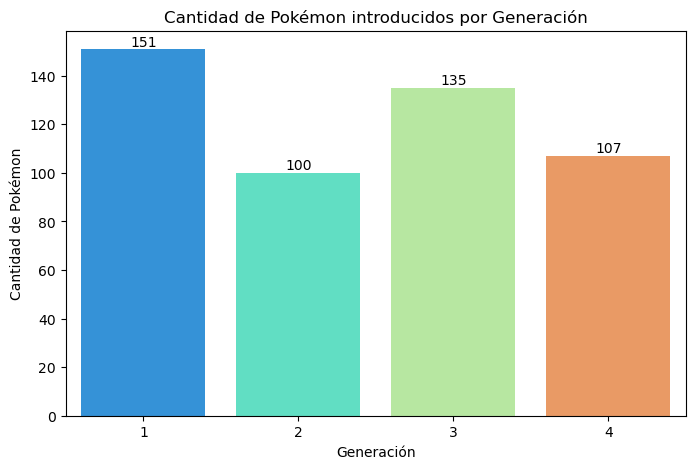

In [3]:
# Contamos la cantidad de Pokémon introducidos por generación
pkmn_por_gen = df_pkmn.groupby('Generation').size()

# Graficamos el resultado
plt.figure(figsize=(8,5))
ax_gen = sns.barplot(x=pkmn_por_gen.index, y=pkmn_por_gen.values, palette="rainbow")
plt.xlabel('Generación')
plt.ylabel('Cantidad de Pokémon')
plt.title('Cantidad de Pokémon introducidos por Generación')

# Agregamos el número arriba de cada barra
for i, value in enumerate(pkmn_por_gen.values):
    plt.text(i, value + 0.010, str(value), ha='center', va='bottom')

plt.show()

Gracias al grafico anterior podemos notar que la generacion que mas pokemon introdujo fue la primera generacion y la que menos pokemon introdujo fue la segunda

### Cuantos pokemon legendarios fueron introducidos en cada generacion ?

Para responder a esta interrogante que desarrollado el siguiente codigo:

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_9252\1096448407.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=legendary_counts.index, y=legendary_counts.values, palette="viridis")


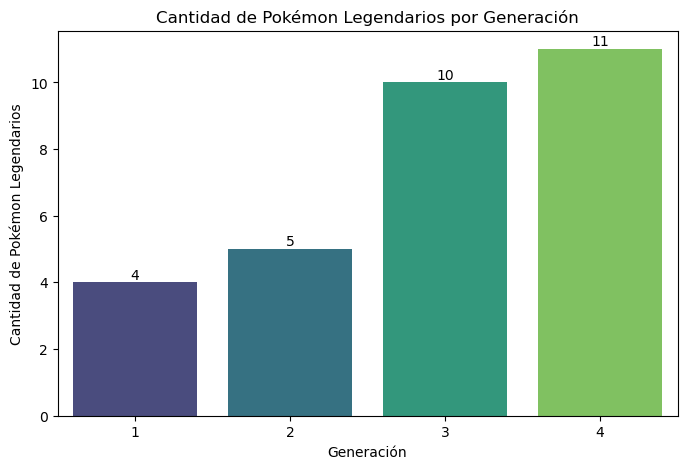

In [4]:
# Contamos la cantidad de Pokémon legendarios por generación
legendary_counts = df_pkmn[df_pkmn['Legendary']].groupby('Generation').size()

# Graficamos el resultado
plt.figure(figsize=(8,5))
ax = sns.barplot(x=legendary_counts.index, y=legendary_counts.values, palette="viridis")
plt.xlabel('Generación')
plt.ylabel('Cantidad de Pokémon Legendarios')
plt.title('Cantidad de Pokémon Legendarios por Generación')

# Agregamos el número arriba de cada barra
for i, value in enumerate(legendary_counts.values):
    plt.text(i, value + 0.010, str(value), ha='center', va='bottom')

plt.show()

A modo de conclución se nota como la cantidad de pokemon legendarios introducidos va aumentando acorde van pasando las generaciones y como la cantidad de los mismos se duplica cuando pasamos de la segunda a la tercera generacion teniendo esta el doble de pokemones legendarios que su generacion antecesora

### Cuantos pokemon de cada tipo primario fueron introducidos en cada generacion ?

Para reponder a la interrogante anterior he desarrollado el siguiente codigo:

<Figure size 1200x700 with 0 Axes>

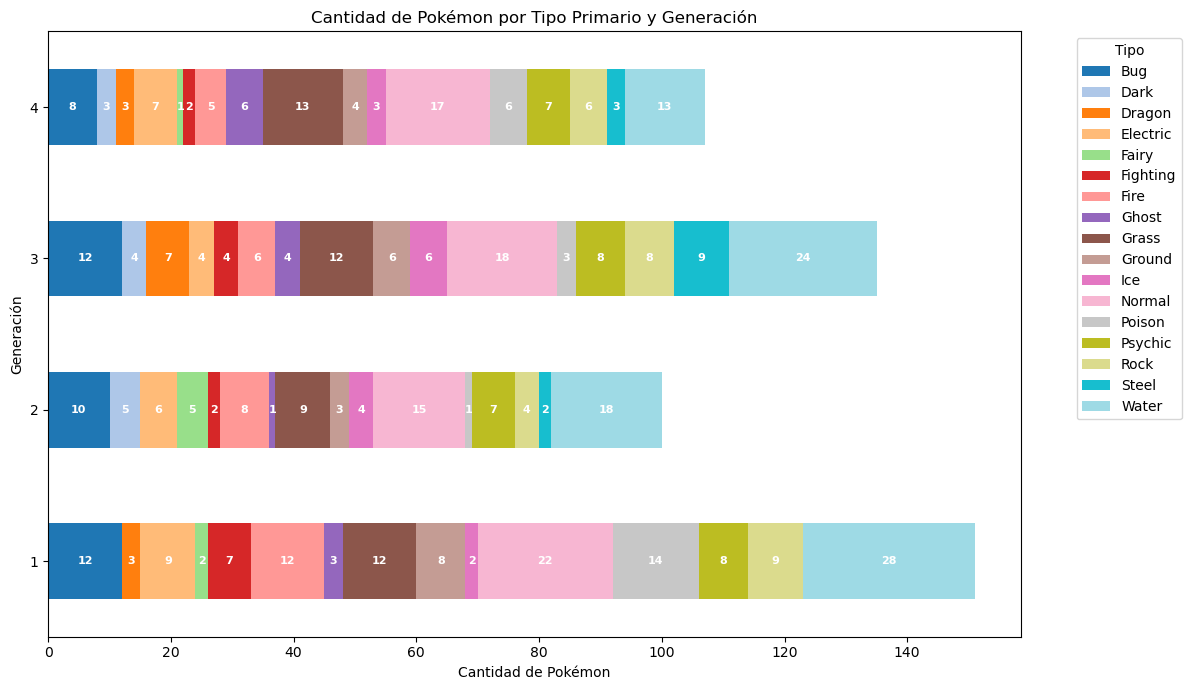

In [5]:
# Contamos la cantidad de Pokémon por tipo y generación
type_counts = df_pkmn.groupby(['Generation', 'Type 1']).size().unstack(fill_value=0)

# Creamos el gráfico de barras apiladas horizontal
plt.figure(figsize=(12, 7))
ax = type_counts.plot(kind='barh', stacked=True, colormap='tab20', figsize=(12, 7))

plt.xlabel('Cantidad de Pokémon')
plt.ylabel('Generación')
plt.title('Cantidad de Pokémon por Tipo Primario y Generación')
plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadimos los números dentro de cada barra
for gen_idx, gen in enumerate(type_counts.index):
    left = 0
    for type_idx, count in enumerate(type_counts.loc[gen]):
        if count > 0:
            ax.text(left + count / 2, gen_idx, str(count), va='center', ha='center', fontsize=8, color='white', fontweight='bold')
            left += count

plt.tight_layout()
plt.show()

A modo de conclusion del gráfico podemos extraer:
- Los tipos primarios 'Water' y 'Normal' se mantienen en catidades elevadas en comparacion con el resto es decir se inducieron cantidades marcadas de estos tipos en cada generacion
- Los tipos 'Bug' y 'Grass' si bien no son los que presentan las cantidades mas elevadas, si presentan una cantidad que pudieramos decir que es intermedia (estan casi simpre por detras de tipos como 'Water' y 'Normal' pero su cantidad es superior casi siempre al resto de tipos introducidos en cada generacion)
- Los tipos primarios menos introducidos por generacion (dentro de los que fueron introducidos) fueron: Primera Generacion: 'Fairy', 'Ice' ; Segunda Generacion: Ghost, Poison ; Tercera Generacion: Poison ; Cuarta Generacion: Fairy

### Cuantos pokemon de cada tipo secundario fueron introducidos en cada generacion ?

Para reponder a esta interrogante nos podra ayudar el siguiente grafico:

<Figure size 1200x700 with 0 Axes>

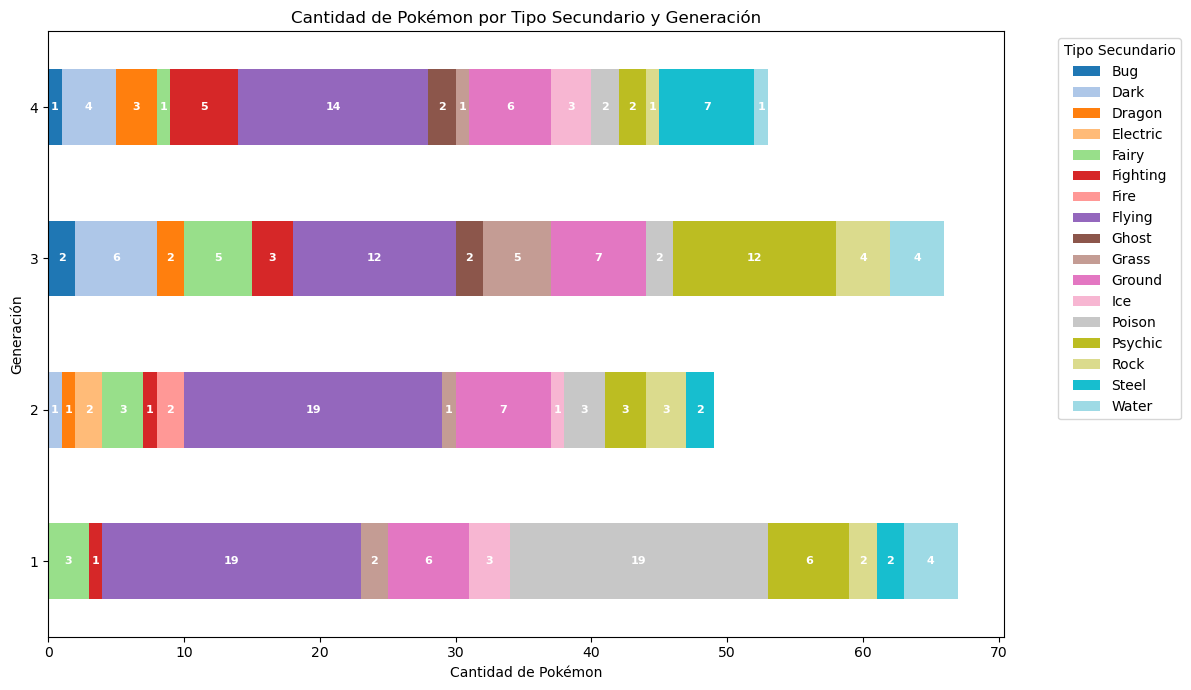

In [6]:
# Contamos la cantidad de Pokémon por tipo secundario y generación
plt.style.use('default')  # Asegura fondo blanco y sin grillas por defecto
type2_counts = df_pkmn.groupby(['Generation', 'Type 2']).size().unstack(fill_value=0)

# Creamos el gráfico de barras apiladas horizontal para Type 2
plt.figure(figsize=(12, 7))

ax2 = type2_counts.plot(kind='barh', stacked=True, colormap='tab20', figsize=(12, 7))

plt.xlabel('Cantidad de Pokémon')
plt.ylabel('Generación')
plt.title('Cantidad de Pokémon por Tipo Secundario y Generación')
plt.legend(title='Tipo Secundario', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadimos los números dentro de cada barra
for gen_idx, gen in enumerate(type2_counts.index):
    left = 0
    for type_idx, count in enumerate(type2_counts.loc[gen]):
        if count > 0:
            ax2.text(left + count / 2, gen_idx, str(count), va='center', ha='center', fontsize=8, color='white', fontweight='bold')
            left += count

plt.tight_layout()
plt.show()

A modo de conclusion de la grafica podemos extraer las siguientes conclusiones:
- En la primera generacion los tipos secundarios mas introducidos fueron 'Flying' y 'Poison' y el que menos fue introducido (dentro de los que fueron introducidos) fue el 'Fighting'
- En la segunda generacion el tipo secundario mas introducido fue el 'Flying' y el resto de los introducidos se mantuvieron en cantidades pequeñas eseptuando al tipo 'Ground'
- En la tercera generacion los tipos secundarios mas introducidos fueron empatados los dos el tipo 'Flying' y el tipo 'Psychic' el resto de los introducidos se mantuvieron en catidades menores eseptuando los tipos 'Dark' y 'Ground'
- En la cuarta generacion el tipo secundario mas predominante de los tipos introducidos fue el tipo 'Flying' solamente seguido y en una cantidad menor por el tipo 'Steel'

### Distribuciones de los estadísticos por generacion

Ahora vamos a ver mediante el siguiente conjunto de graficos como se distribuyen los diferentes estadisticos acorde a cada generacion para asi poder observar si existen diferencias entre los estadisticos de cada pokemon por generacion

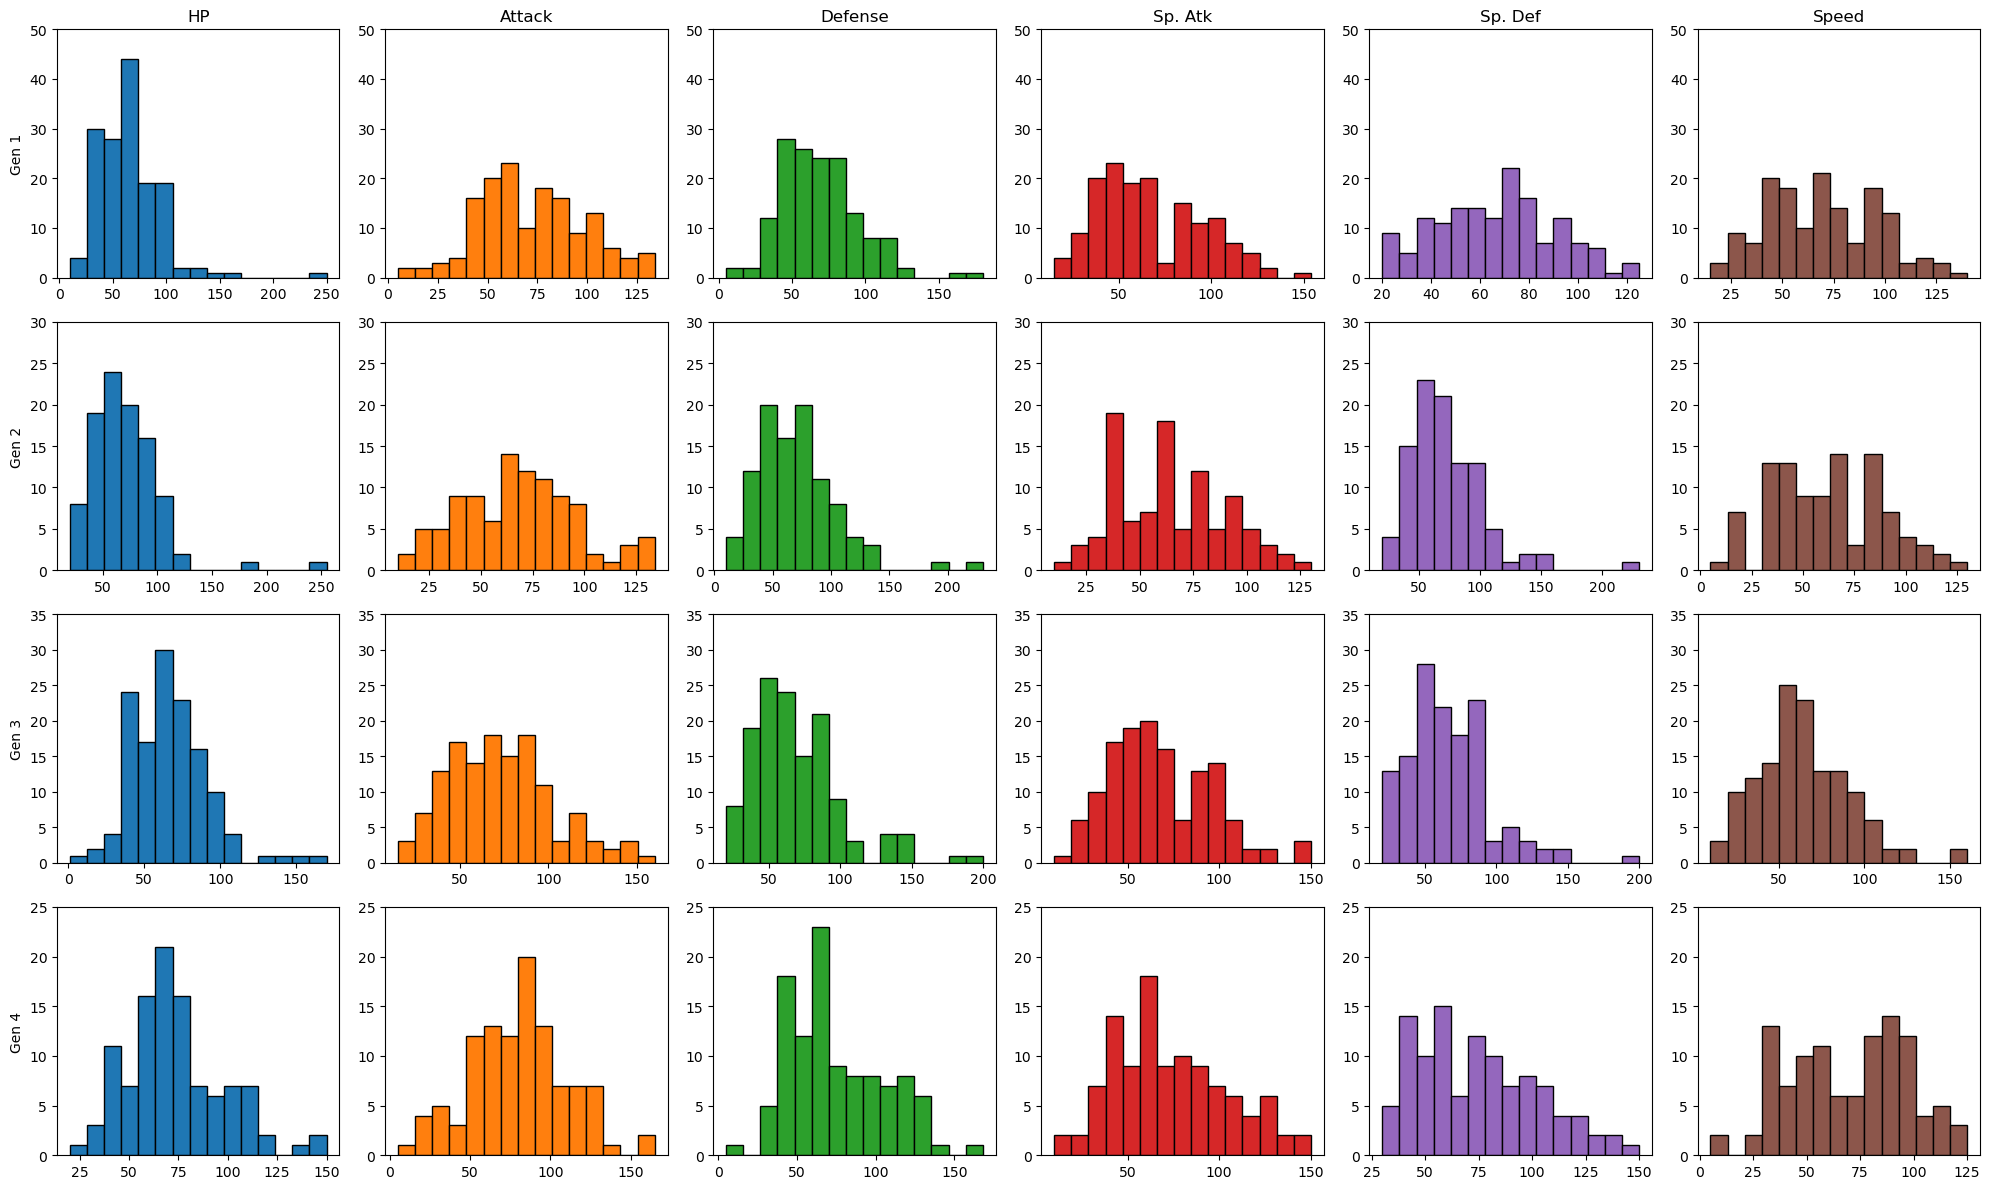

In [7]:
# Creamos histogramas para cada estadística y generación
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
generaciones = sorted(df_pkmn['Generation'].unique())
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, axes = plt.subplots(len(generaciones), len(stats), figsize=(20, 12), sharey='row')
for i, gen in enumerate(generaciones):
    df_gen = df_pkmn[df_pkmn['Generation'] == gen]
    for j, (stat, color) in enumerate(zip(stats, colores)):
        ax = axes[i, j]
        ax.hist(df_gen[stat], bins=15, color=color, edgecolor='black')
        if i == 0:
            ax.set_title(stat)
        if j == 0:
            ax.set_ylabel(f'Gen {gen}')
        ax.set_xlabel('')
        # Modificación clave: Mostrar los números en el eje vertical
        ax.set_yticks(ax.get_yticks()) # Mantiene los ticks existentes
        ax.tick_params(axis='y', labelleft=True) # Asegura que las etiquetas estén visibles

plt.tight_layout()
plt.show()

El conjunto de graficos que hemos representado no ayuda a intuir que la distribucion que sigue cada caracteristica por generacion es la distribusion normal; estas distribuciones presentaran mas o menos sesgo dependiendo de la generacion y el estadistico del pokemon en cuestion 

### Existen valores atípicos entre los diferentes estadísticos pokemon en cada generacion ?

Para reponder a esta pregunta contamos con el siguiente conjunto de graficos de caja y bigote:

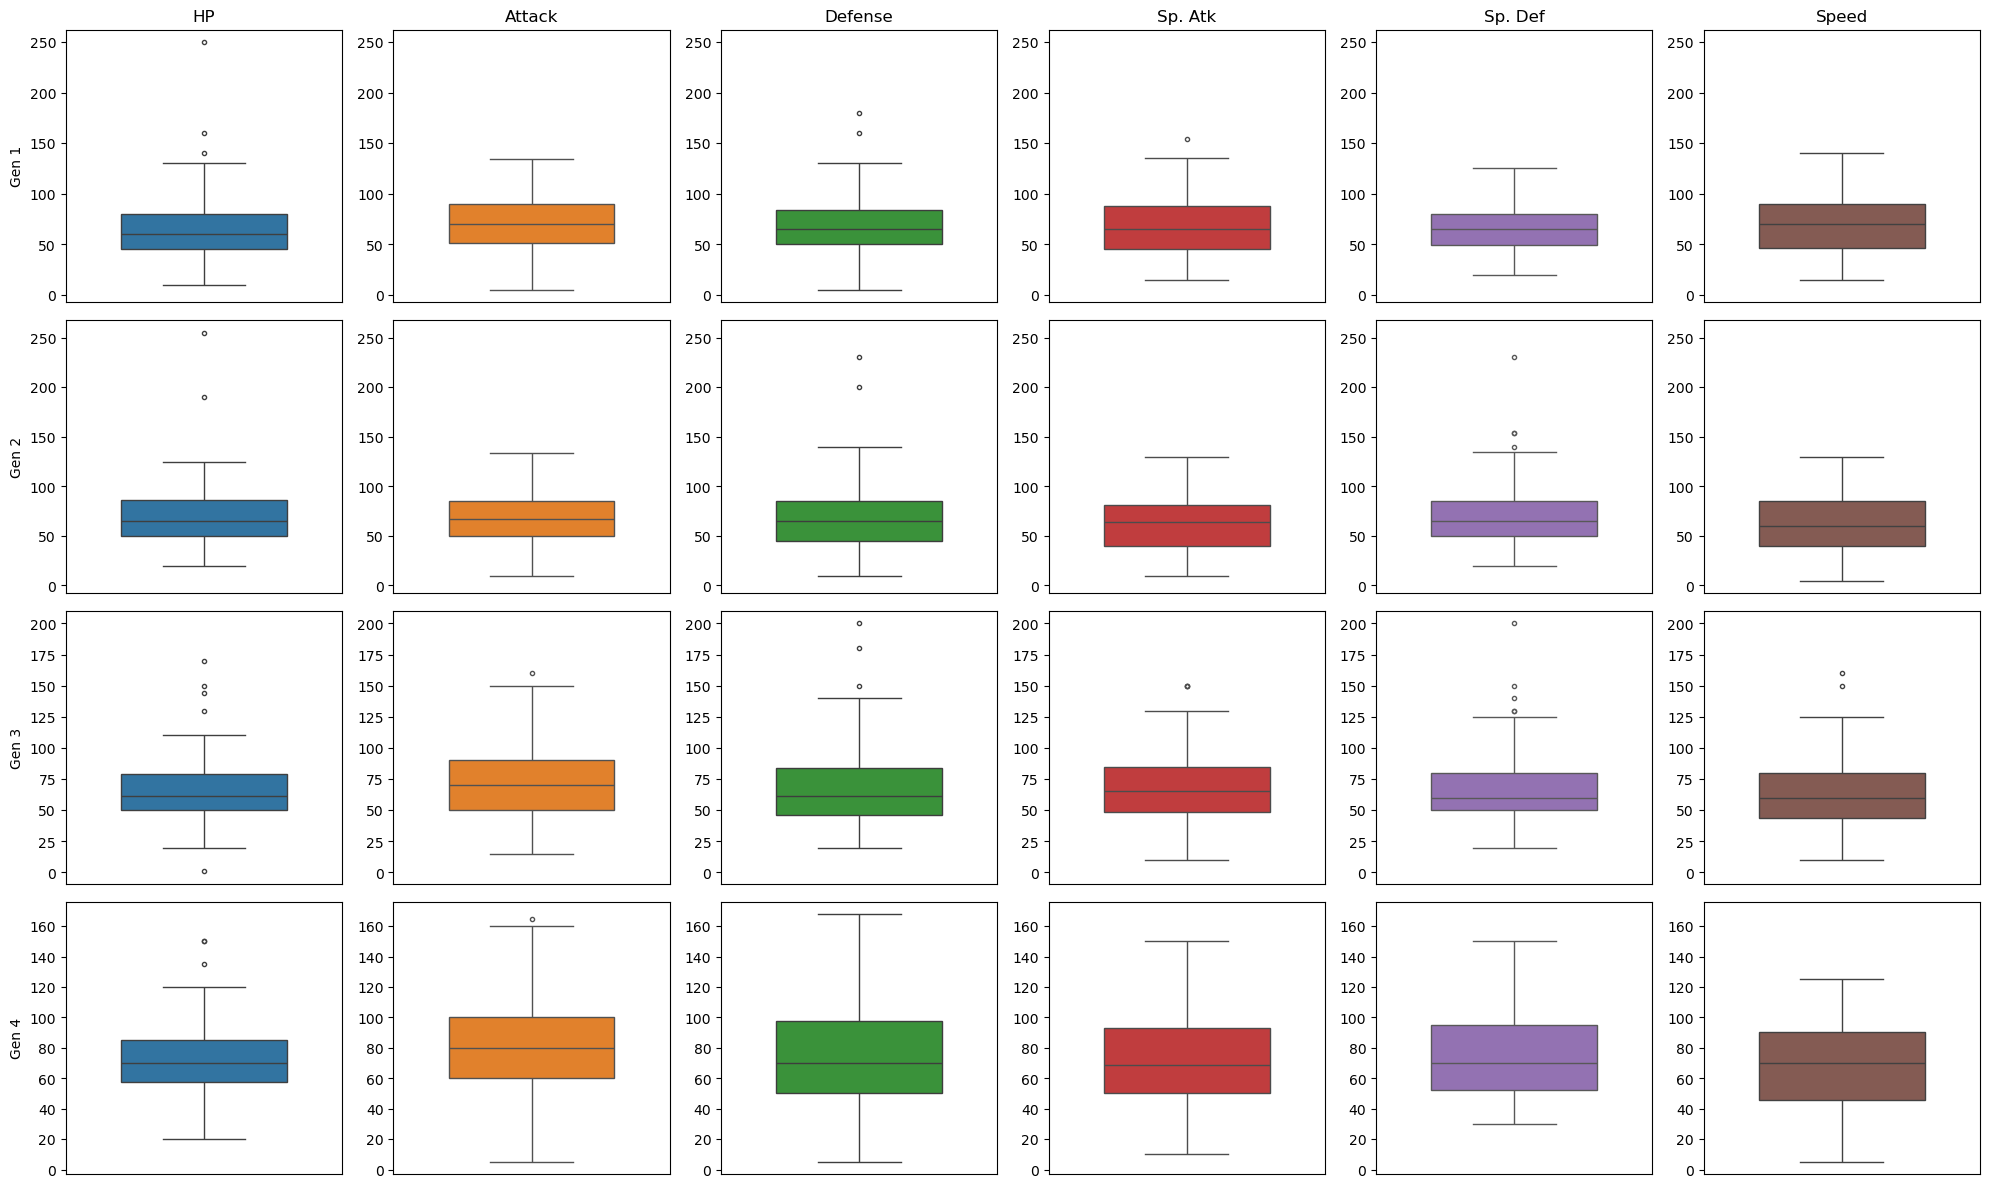

In [8]:
# Creamos gráficos de caja y bigotes para cada estadística y generación
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
generaciones = sorted(df_pkmn['Generation'].unique())
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, axes = plt.subplots(len(generaciones), len(stats), figsize=(20, 12), sharey='row')

for i, gen in enumerate(generaciones):
    df_gen = df_pkmn[df_pkmn['Generation'] == gen]
    for j, (stat, color) in enumerate(zip(stats, colores)):
        ax = axes[i, j]
        # Usamos seaborn.boxplot para crear los gráficos de caja y bigotes
        sns.boxplot(y=df_gen[stat], ax=ax, color=color, width=0.6, fliersize=3)
        
        if i == 0:
            ax.set_title(stat)
        if j == 0:
            ax.set_ylabel(f'Gen {gen}')
        ax.set_xlabel('')
        # El eje x no necesita etiquetas para los boxplots individuales
        ax.set_xticks([]) 
        # Aseguramos que los números en el eje Y sean visibles
        ax.tick_params(axis='y', labelleft=True)

plt.tight_layout()
plt.show()

Gracias al conjunto de graficos de caja y bigotes de cada estadistico pokemon por generacion podemos notar la presencia de valores atipicos (outlayers) en algunos estadisticos y tambien notamos que no son muchos en cantidad 

### Existe alguna relacion lineal entre las estadisticas de los pokemon y la generacion a la que pertenecen ?

Para reponder a la interrogante he desarrollado el siguiente bloque de código:

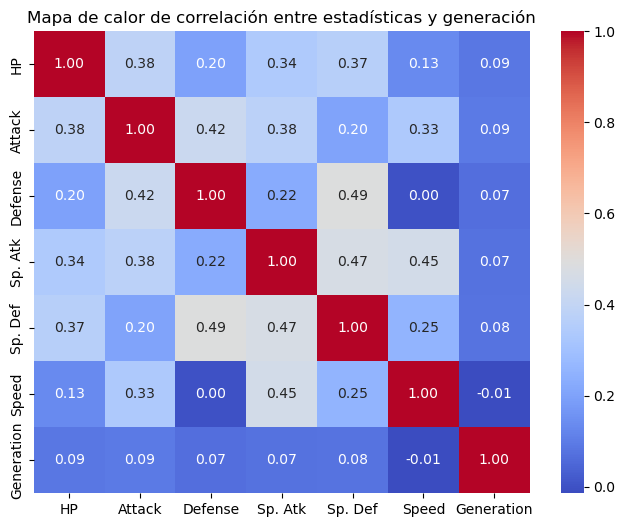

In [9]:
# Creamos un heatmap de correlación entre las columnas seleccionadas
cols_heatmap = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
corr_matrix = df_pkmn[cols_heatmap].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre estadísticas y generación')
plt.show()

La heatmap de correlación muestra cómo se relacionan las estadísticas de los Pokémon entre sí y con la generación a la que pertenecen. De la matriz podemos extraer:

- Las correlaciones más altas se observan entre pares como **Defense y Sp. Def** (0.49), **Sp. Atk y Sp. Def** (0.47), y **Sp. Atk y Speed** (0.45), lo que indica que Pokémon con alta defensa suelen tener también alta defensa especial, y los que tienen alto ataque especial tienden a ser más rápidos.
- Las correlaciones entre las estadísticas y la **Generación** son bajas (todas menores a 0.1 en valor absoluto), lo que sugiere que no existe una relación lineal fuerte entre los valores de las estadísticas y la generación a la que pertenece el Pokémon.
- En general, las estadísticas individuales presentan correlaciones positivas entre sí, pero ninguna es extremadamente alta, lo que indica que cada estadística aporta información diferenciada sobre los Pokémon.

En resumen, la heatmap revela que las estadísticas de los Pokémon están moderadamente relacionadas entre sí, pero la generación no influye de manera significativa en los valores de estas estadísticas.

### Resumen general

Ahora os resumire todo lo hecho en este notebook mediante una tabla resumen para sintetizar todo lo hecho

| Pregunta / Análisis                                                        | Método / Visualización                              | Principales conclusiones                                                                                   |
|----------------------------------------------------------------------------|-----------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| Vistazo estadístico general                                                | `.describe()`                                       | Distribución y valores promedio de los stats. HP, Attack y Speed presentan mayor variabilidad.             |
| Pokémon por generación                                                     | Gráfico de barras                                   | La 1ra generación introdujo más Pokémon; la 2da, menos.                                                    |
| Pokémon legendarios por generación                                         | Gráfico de barras                                   | El número de legendarios aumenta con las generaciones, especialmente en la 3ra y 4ta.                      |
| Tipos primarios por generación                                             | Barras apiladas horizontales                        | 'Water' y 'Normal' son los más frecuentes; 'Bug' y 'Grass' intermedios; otros tipos menos representados.   |
| Tipos secundarios por generación                                           | Barras apiladas horizontales                        | 'Flying' y 'Poison' predominan como secundarios en la 1ra y 2da generación; variedad en generaciones posteriores. |
| Distribución de stats por generación                                       | Histogramas por generación y estadístico            | Las distribuciones tienden a ser normales, con sesgos según generación y estadístico.                      |
| Valores atípicos en los stats                                              | Boxplots por generación y estadístico               | Existen outliers en algunos stats, pero no son numerosos.                                                   |
| Correlación entre stats y generación                                       | Heatmap de correlación                              | Los stats están moderadamente correlacionados entre sí; la generación no influye linealmente en los stats. |

**Resumen:**  
El análisis exploratorio revela patrones claros en la cantidad y tipo de Pokémon introducidos por generación, la presencia de legendarios, la distribución y relación entre sus estadísticas, y la existencia de algunos valores atípicos. No se observa una relación lineal fuerte entre los stats y la generación, pero sí correlaciones moderadas entre algunos atributos.